# **Introduction**

 **Purpose of Project**: I want to understand the salary distributions for data scientists among major sectors within the [Data Science and STEM Salaries](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries?select=Levels_Fyi_Salary_Data.csv) csv file from Kaggle. I chose to use and explore this dataset because I was curious to find out and understand the validity of salaries for STEM job titles. When researching estimated job salaries online, the numbers presented for certain job titles can be misleading and may not present the whole picture. Thus, I felt that exploring this dataset would provide a better picture and the specifics of certain STEM role. 

Furthermore, I choose the following research questions will be explored:

*    What are salary distributions among data scientists 
at major tech companies?
*    What are the salary distributions among males vs females data scientists within a major tech city?
*    What are the salary distributions among data scientists from two different locations?

The provided dataset encompasses an array of STEM (science, technology, engineering, and mathematics) job titles (Software Engineer, Data Scientist, etc.); their associated company (Google, Apple, Microsoft, Facebook, etc.); the number of years the candidate has been at the company; their years of experience within that job title; how each candidate identifies their gender; the base salary and total salary for each candidate; the location of the established associated company, so on and so forth.

The dataset explores 62642 rows and 29 columns of data pertaining to STEM jobs, their salaries, and any contributing factors.

For this project I will explore the following hypotheses:


* $H_0$: There isn’t a significant difference in mean salary of data scientists who work at Google versus Microsoft.
* $H_a$: There is a significant difference in mean salary of data scientists who work at Google versus Microsoft.



* $H_0$: There isn’t a significant difference in mean salary among males data scientists versus female data scientists in San Francisco, CA.
* $H_a$: There is a significant difference in mean salary among males data scientists versus female data scientists in San Francisco, CA.



* $H_0$: There isn’t a significant difference in mean salary among data scientist individuals who reside in Seattle, WA versus Austin, TX
* $H_a$: There is a significant difference in mean salary among data scientist individuals who reside in Seattle, WA versus Austin, TX.










*Link to Kaggle Data Source:[https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries?select=Levels_Fyi_Salary_Data.csv](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries?select=Levels_Fyi_Salary_Data.csv)*

# **Load Data**

This section will import the dataset to be analyzed.

*Import necessary packages/libraries*

In [ ]:
import pandas as pd
from scipy import stats

*Upload csv file to colab*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_scientist_salary_data.csv to data_scientist_salary_data.csv


*Import into a dataframe*

In [ ]:
import io
salaries_df = pd.read_csv(io.BytesIO(uploaded['data_scientist_salary_data.csv']))

*Dataset is now stored in a Pandas Dataframe*

________________________________________________________________________________

# **Wrangled Data**

This section explores what the dataset is encompassing. I will explore data that is relevant to support my hypotheses.

*Obtain row and column count of dataset*

In [ ]:
salaries_df.shape

(62642, 29)

*Extract dataframe's information*

In [ ]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

*Overview of what the data looks like*

In [ ]:
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


*Count the number of unique values in this company column*

In [ ]:
salaries_df['company'].nunique()

1631

*Count the number of unique values in this total yearly compensation column*

In [ ]:
salaries_df['totalyearlycompensation'].nunique()

893

*Count the number of unique values in this title column*

In [ ]:
salaries_df['title'].nunique()

15

*Count the number of unique values in this gender column*

In [ ]:
salaries_df['gender'].nunique()

4

*Count the number of unique values in this location column*

In [ ]:
salaries_df['location'].nunique()

1050

*Find the frequency of each value in the total yearly compensation column and obtain a statistical description*

In [ ]:
salary_counts = salaries_df['totalyearlycompensation'].value_counts()
salary_counts.describe()

count     893.000000
mean       70.147816
std       134.498139
min         1.000000
25%         2.000000
50%        15.000000
75%        87.000000
max      1196.000000
Name: totalyearlycompensation, dtype: float64

*Find the frequency of each value in the company column. Only pring the first 10, because there is a total of 1631.*

In [ ]:
company_counts = salaries_df['company'].value_counts()
company_counts.head(10)

Amazon        8126
Microsoft     5216
Google        4330
Facebook      2990
Apple         2028
Oracle        1128
Salesforce    1056
Intel          949
IBM            907
Cisco          907
Name: company, dtype: int64

*Find the frequency of each value in the title column. Print all 15 main categories.*

In [ ]:
title_counts = salaries_df['title'].value_counts()
title_counts

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

**Data Scientist Titles**

*Find Data Scientist title counts in data set*

In [ ]:
ds_df = salaries_df[salaries_df['title']=='Data Scientist']
ds_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000
mean,203656.710628,5.059348,2.057622,138054.693561,40867.339022,17617.145074,9986.732739,620.963150,43468.069822,0.309542,0.094259,0.147789,0.001552,0.000388,0.195888,0.122964,0.010861,0.005043,0.012413
std,109504.643967,4.103621,2.256803,64405.538993,62490.550717,22240.502215,6609.613358,275.901269,24508.271158,0.462395,0.292246,0.354960,0.039367,0.019695,0.396960,0.328459,0.103669,0.070846,0.110740
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1182.000000,0.000000,813.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135000.000000,2.000000,1.000000,110000.000000,0.000000,1250.000000,7419.000000,505.000000,22799.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,185000.000000,4.000000,2.000000,140000.000000,20000.000000,14000.000000,8178.000000,807.000000,44403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,250000.000000,7.000000,3.000000,165000.000000,51000.000000,25000.000000,11521.000000,807.000000,65561.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,34.000000,20.000000,700000.000000,700000.000000,350000.000000,47926.000000,862.000000,83867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Scientists' Total Salary**

*Find the count and statistical calculations of Data Scientists' yearly total compensation.*

In [ ]:
dssalary_df = ds_df['totalyearlycompensation']
dssalary_df.describe()

count       2578.000000
mean      203656.710628
std       109504.643967
min        10000.000000
25%       135000.000000
50%       185000.000000
75%       250000.000000
max      1000000.000000
Name: totalyearlycompensation, dtype: float64

*Find the frequency of each value in the column. Print all 3 categories.*

In [ ]:
gender_counts = salaries_df['gender'].value_counts()
gender_counts

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

*Find male data scientists gender counts in data set*

In [ ]:
males_df = ds_df[ds_df['gender']=='Male']
males_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,202107.590273,5.043478,2.023287,139061.164333,40952.837141,18056.005895,10029.946942,601.501105,41397.712601,0.398674,0.132646,0.200442,0.001474,0.000737,0.280766,0.184967,0.012528,0.006632,0.021371
std,112187.383715,4.283159,2.270639,67034.629382,60442.169767,23513.940878,6780.779305,286.674159,24361.831747,0.489806,0.339316,0.400479,0.038376,0.027146,0.449539,0.388414,0.111265,0.081198,0.144670
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1182.000000,0.000000,813.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133000.000000,2.000000,0.000000,110000.000000,0.000000,3000.000000,7413.000000,501.000000,20244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,183000.000000,4.000000,2.000000,140000.000000,20000.000000,14000.000000,8198.000000,807.000000,39079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,248000.000000,7.000000,3.000000,165000.000000,54000.000000,25000.000000,11470.000000,807.000000,63187.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,900000.000000,30.000000,19.000000,700000.000000,470000.000000,350000.000000,47926.000000,839.000000,83816.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Find female data scientist gender counts in data set*

In [ ]:
females_df = ds_df[ds_df['gender']=='Female']
females_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0,361.00000,361.000000,361.000000,361.000000,361.000000
mean,190063.711911,4.379501,1.853186,136005.540166,34085.872576,15869.806094,9906.110803,656.462604,44926.332410,0.476454,0.141274,0.135734,0.002770,0.0,0.32687,0.174515,0.027701,0.011080,0.008310
std,80737.598542,3.208066,1.982979,49934.734875,43248.453343,15446.581866,6568.299913,255.084886,23777.102899,0.500138,0.348788,0.342981,0.052632,0.0,0.46972,0.380079,0.164342,0.104824,0.090907
min,13000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1182.000000,0.000000,855.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
25%,135000.000000,2.000000,0.000000,115000.000000,0.000000,5000.000000,7416.000000,511.000000,24856.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
50%,182000.000000,4.000000,1.000000,140000.000000,20000.000000,14000.000000,7472.000000,807.000000,46832.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
75%,228000.000000,6.000000,3.000000,160000.000000,50000.000000,21000.000000,11470.000000,807.000000,65488.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.000000,0.000000
max,634000.000000,20.000000,13.000000,400000.000000,353000.000000,120000.000000,47926.000000,825.000000,83623.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000


*Find the frequency of each value in the location column for data scientists. Only print the first 10.*

In [ ]:
location_counts = ds_df['location'].value_counts()
location_counts.head(10)

San Francisco, CA    373
Seattle, WA          311
New York, NY         245
Redmond, WA          105
Menlo Park, CA        94
Sunnyvale, CA         84
San Jose, CA          72
Mountain View, CA     69
Cupertino, CA         57
Boston, MA            55
Name: location, dtype: int64

*Find San Francisco, CA counts in data set for data scientists*

In [ ]:
sf_df = ds_df[ds_df['location']=='San Francisco, CA']
sf_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.0,373.0,373.000000,373.000000,373.000000,373.000000,373.0,373.0,373.000000,373.000000,373.000000,373.0,373.000000
mean,271155.495979,5.018767,1.618633,162785.522788,79825.737265,18029.490617,7419.0,807.0,40472.705094,0.246649,0.080429,0.152815,0.0,0.0,0.176944,0.096515,0.008043,0.0,0.008043
std,113753.565243,3.744124,1.551831,52266.501788,85769.409429,20450.614235,0.0,0.0,23626.413382,0.431640,0.272321,0.360292,0.0,0.0,0.382134,0.295693,0.089441,0.0,0.089441
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7419.0,807.0,813.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,195000.000000,2.000000,0.000000,143000.000000,25000.000000,0.000000,7419.0,807.0,21039.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,250000.000000,4.000000,1.000000,164000.000000,55000.000000,15000.000000,7419.0,807.0,39341.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,320000.000000,7.000000,2.000000,190000.000000,100000.000000,30000.000000,7419.0,807.0,61110.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,1000000.000000,20.000000,11.000000,400000.000000,700000.000000,153000.000000,7419.0,807.0,83044.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000


*Find Seattle, WA counts in data set for data scientists*

In [ ]:
sea_df = ds_df[ds_df['location']=='Seattle, WA']
sea_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0,311.0,311.000000,311.000000,311.000000,311.000000,311.0,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,233199.356913,5.643087,2.170096,140138.263666,60025.723473,19414.790997,11527.0,819.0,40578.096463,0.270096,0.077170,0.160772,0.0,0.003215,0.167203,0.090032,0.019293,0.003215,0.003215
std,100394.056499,4.075649,2.443181,46114.830539,74280.675084,22138.529540,0.0,0.0,25468.711567,0.444725,0.267292,0.367912,0.0,0.056705,0.373758,0.286689,0.137773,0.056705,0.056705
min,70000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11527.0,819.0,845.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170000.000000,3.000000,0.000000,127500.000000,15500.000000,0.000000,11527.0,819.0,17232.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212000.000000,5.000000,2.000000,147000.000000,40000.000000,15000.000000,11527.0,819.0,39724.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,264000.000000,8.000000,3.000000,160000.000000,80000.000000,27000.000000,11527.0,819.0,64101.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,740000.000000,25.000000,19.000000,300000.000000,438000.000000,175000.000000,11527.0,819.0,83609.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Find Austin, TX counts in data set for data scientists*

In [ ]:
aus_df = ds_df[ds_df['location']=='Austin, TX']
aus_df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0,36.000000,36.000000,36.000000,36.000000,36.0,36.0,36.000000,36.000000,36.0,36.0,36.000000
mean,163472.222222,4.194444,1.583333,128222.222222,22083.333333,13333.333333,10965.0,635.0,54229.138889,0.416667,0.138889,0.111111,0.0,0.0,0.194444,0.277778,0.0,0.0,0.027778
std,51752.977063,3.133409,1.537623,28338.879009,22472.046127,8921.883209,0.0,0.0,20879.508674,0.500000,0.350736,0.318728,0.0,0.0,0.401386,0.454257,0.0,0.0,0.166667
min,95000.000000,0.000000,0.000000,85000.000000,0.000000,0.000000,10965.0,635.0,2962.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,121000.000000,2.000000,0.000000,105000.000000,3750.000000,8000.000000,10965.0,635.0,46367.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
50%,146000.000000,3.000000,1.000000,124000.000000,17000.000000,12500.000000,10965.0,635.0,59242.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
75%,201250.000000,5.250000,3.000000,155000.000000,38500.000000,15500.000000,10965.0,635.0,69322.500000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000
max,289000.000000,15.000000,5.000000,185000.000000,80000.000000,40000.000000,10965.0,635.0,80351.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000


***NULL Data***

*Determine data with NULL (NaN) values for Data Scientists*

In [ ]:
null_rows = ds_df[ds_df.isnull().any(axis=1)]
null_rows.head(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000,220000.0,10000.0,Male,NaN,7419,807.0,813,0,0,0,0,0,0,0,0,0,0,NaN,NaN
440,6/8/2018 9:49,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000,28000.0,23000.0,Male,NaN,11527,819.0,849,0,0,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/2018 17:55,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0,0.0,0.0,Female,NaN,7422,807.0,855,0,0,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/2018 19:39,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000,280000.0,20000.0,Male,NaN,7419,807.0,870,0,0,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/2018 11:39,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000,140000.0,40000.0,Male,NaN,11527,819.0,938,0,0,0,0,0,0,0,0,0,0,NaN,NaN
499,6/17/2018 19:02,Amazon,L5,Data Scientist,200000,"Seattle, WA",3.0,0.0,ML / AI,150000,105000.0,81000.0,Male,NaN,11527,819.0,942,0,0,0,0,0,0,0,0,0,0,NaN,NaN
509,6/20/2018 0:47,Microsoft,65,Data Scientist,340000,"Bellevue, WA",11.0,11.0,ML / AI,200000,80000.0,60000.0,Male,NaN,11470,819.0,957,0,0,0,0,0,0,0,0,0,0,NaN,NaN
510,6/20/2018 0:49,Google,L6,Data Scientist,690000,"Kirkland, WA",10.0,0.0,ML / AI,240000,298000.0,72000.0,Male,NaN,11497,819.0,958,0,0,0,0,0,0,0,0,0,0,NaN,NaN
513,6/21/2018 10:54,Netflix,Senior,Data Scientist,600000,"Los Gatos, CA",3.0,1.0,ML / AI,600000,0.0,0.0,Male,NaN,7277,807.0,966,0,0,0,0,0,0,0,0,0,0,NaN,NaN
523,6/25/2018 8:45,Tesla,Senior Engineer,Data Scientist,168000,"Palo Alto, CA",8.0,3.0,Mechanical Engineering,118000,50000.0,0.0,Male,Disregard the Data Scientist. I'm a Mechanical...,7351,807.0,981,0,0,0,0,0,0,0,0,0,0,NaN,NaN


*Determine the Null Count of each column and their data type from the data set.*

In [ ]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 419 to 62623
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1705 non-null   object 
 1   company                  1705 non-null   object 
 2   level                    1699 non-null   object 
 3   title                    1705 non-null   object 
 4   totalyearlycompensation  1705 non-null   int64  
 5   location                 1705 non-null   object 
 6   yearsofexperience        1705 non-null   float64
 7   yearsatcompany           1705 non-null   float64
 8   tag                      1700 non-null   object 
 9   basesalary               1705 non-null   int64  
 10  stockgrantvalue          1705 non-null   float64
 11  bonus                    1705 non-null   float64
 12  gender                   867 non-null    object 
 13  otherdetails             942 non-null    object 
 14  cityid               

*Substitute NaN values with zeroes for Data Scientist data set.*

In [ ]:
zero_filled = null_rows.fillna(0)
zero_filled.head(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000,220000.0,10000.0,Male,0,7419,807.0,813,0,0,0,0,0,0,0,0,0,0,0,0
440,6/8/2018 9:49,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000,28000.0,23000.0,Male,0,11527,819.0,849,0,0,0,0,0,0,0,0,0,0,0,0
444,6/8/2018 17:55,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,0,0,0.0,0.0,Female,0,7422,807.0,855,0,0,0,0,0,0,0,0,0,0,0,0
454,6/10/2018 19:39,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000,280000.0,20000.0,Male,0,7419,807.0,870,0,0,0,0,0,0,0,0,0,0,0,0
495,6/17/2018 11:39,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,0,190000,140000.0,40000.0,Male,0,11527,819.0,938,0,0,0,0,0,0,0,0,0,0,0,0
499,6/17/2018 19:02,Amazon,L5,Data Scientist,200000,"Seattle, WA",3.0,0.0,ML / AI,150000,105000.0,81000.0,Male,0,11527,819.0,942,0,0,0,0,0,0,0,0,0,0,0,0
509,6/20/2018 0:47,Microsoft,65,Data Scientist,340000,"Bellevue, WA",11.0,11.0,ML / AI,200000,80000.0,60000.0,Male,0,11470,819.0,957,0,0,0,0,0,0,0,0,0,0,0,0
510,6/20/2018 0:49,Google,L6,Data Scientist,690000,"Kirkland, WA",10.0,0.0,ML / AI,240000,298000.0,72000.0,Male,0,11497,819.0,958,0,0,0,0,0,0,0,0,0,0,0,0
513,6/21/2018 10:54,Netflix,Senior,Data Scientist,600000,"Los Gatos, CA",3.0,1.0,ML / AI,600000,0.0,0.0,Male,0,7277,807.0,966,0,0,0,0,0,0,0,0,0,0,0,0
523,6/25/2018 8:45,Tesla,Senior Engineer,Data Scientist,168000,"Palo Alto, CA",8.0,3.0,Mechanical Engineering,118000,50000.0,0.0,Male,Disregard the Data Scientist. I'm a Mechanical...,7351,807.0,981,0,0,0,0,0,0,0,0,0,0,0,0


*Print the original size of the Data Scientists DataFrame | Then drop `NaN` rows | Lastly, print the size of the modified Data Scientist DataFrame*

In [ ]:
print(ds_df.size)
clean_salaries = ds_df.dropna()
print(clean_salaries.size)

74762
25317


_______________________________________________________________________________

# **Preparation for Hypotheses**

This section will analyze relevant data in preparation for statistical analysis.

*Find value for Data Scientists total yearly salary at Google in a dataframe table*

In [ ]:
dsgoogle_df = clean_salaries[clean_salaries['company']=='Google']
dsgoogle_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23679,7/6/2020 17:16,Google,L3,Data Scientist,170000,"San Francisco, CA",3.0,3.0,ML / AI,170000,0.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32433,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
24547,7/20/2020 15:52,Google,L6,Data Scientist,289000,"Austin, TX",15.0,3.0,ML / AI,172000,80000.0,40000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",10965,635.0,33652,0,0,1,0,0,0,1,0,0,0,White,PhD
26673,8/16/2020 1:32,Google,L4,Data Scientist,277000,"Mountain View, CA",9.0,2.0,Product Analyst,172000,75000.0,30000.0,Male,"Race: Asian, Academic Level: Doctorate (PhD)",7322,807.0,36677,0,0,1,0,0,1,0,0,0,0,Asian,PhD
27850,8/26/2020 22:42,Google,L4,Data Scientist,195000,"San Francisco, CA",1.0,1.0,Data,143000,30000.0,22000.0,Male,"Race: Hispanic / Latino, Academic Level: Docto...",7419,807.0,38265,0,0,1,0,0,0,0,0,0,1,Hispanic,PhD
27987,8/28/2020 8:14,Google,L4,Data Scientist,208000,"Sunnyvale, CA",7.0,5.0,Trust safety,137000,50000.0,21000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7472,807.0,38473,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree


*Determine the total salaries of Data Scientists at Google*

In [ ]:
salarygoogle_df = dsgoogle_df['totalyearlycompensation']
salarygoogle_df

23679    170000
24547    289000
26673    277000
27850    195000
27987    208000
29094    175000
30958    345000
31196    500000
31357    274000
33053    220000
37254    291000
38018    345000
38131    236000
38654    264000
38687    262000
39016    308000
39227    282000
39651    283000
39969    216000
41749    455000
43700    199000
48229    266000
49648    336000
50411    252000
53194    332000
55685    197000
58532    225000
59021    219000
Name: totalyearlycompensation, dtype: int64

*Find statistical references for Data Scientists' salary at Google*

In [ ]:
salarygoogle_df.describe()

count        28.000000
mean     272178.571429
std       76876.068410
min      170000.000000
25%      218250.000000
50%      265000.000000
75%      295250.000000
max      500000.000000
Name: totalyearlycompensation, dtype: float64

*Find value for Data Scientists total yearly salary at Microsoft in a dataframe table*

In [ ]:
dsmicrosoft_df = clean_salaries[clean_salaries['company']=='Microsoft']
dsmicrosoft_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23699,7/6/2020 22:10,Microsoft,62,Data Scientist,220000,"Bellevue, WA",4.0,2.0,Data science,150000,60000.0,10000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",11470,819.0,32454,0,0,1,0,0,0,1,0,0,0,White,PhD
27884,8/27/2020 11:08,Microsoft,64,Data Scientist,257000,"Seattle, WA",15.0,9.0,ML / AI,187000,33000.0,37000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",11527,819.0,38324,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
28621,9/2/2020 20:45,Microsoft,62,Data Scientist,209000,"Redmond, WA",2.0,2.0,ML / AI,152000,44000.0,13000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",11521,819.0,39355,0,0,1,0,0,0,1,0,0,0,White,PhD
28624,9/2/2020 20:54,Microsoft,62,Data Scientist,209000,"Redmond, WA",5.0,5.0,ML / AI,156000,39000.0,14000.0,Male,"Race: Asian, Academic Level: Master’s degree",11521,819.0,39360,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
28726,9/3/2020 10:50,Microsoft,64,Data Scientist,248000,"Redmond, WA",15.0,5.0,Data,179000,34000.0,35000.0,Male,"Race: Asian, Academic Level: Master’s degree",11521,819.0,39503,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


*Determine the total salaries of Data Scientists at Microsoft*

In [ ]:
salarymicrosoft_df = dsmicrosoft_df['totalyearlycompensation']
salarymicrosoft_df

23699    220000
27884    257000
28621    209000
28624    209000
28726    248000
28921    234000
29042    194000
30021    194000
30106    227000
30195    168000
30700    122000
31449    156000
32039    159000
33258    182000
33279    230000
33991    159000
34511    185000
34942    292000
35300    350000
36996    182000
37519    280000
39075    240000
40321    173000
40488    163000
41107     69000
41650    202000
41728    153000
42481    510000
42639    225000
42946    283000
43578    182000
44443    100000
44717    273000
45501    193000
46139    345000
46475    166000
48722    105000
49276    194000
49814    209000
50083    248000
53632    400000
55217    160000
56636    165000
56692    190000
56909    181000
57058    212000
57486    143000
57863    206000
60487    162000
61284    205000
Name: totalyearlycompensation, dtype: int64

*Find statistical references for Data Scientists' salary at Microsoft*

In [ ]:
salarymicrosoft_df.describe()

count        50.000000
mean     210280.000000
std       75394.212954
min       69000.000000
25%      165250.000000
50%      194000.000000
75%      233000.000000
max      510000.000000
Name: totalyearlycompensation, dtype: float64

*Combine Google dataset and Microsoft dataset for Data Scientists*

In [ ]:
d1 = dsgoogle_df
d2 = dsmicrosoft_df

df1 = pd.DataFrame(d1, columns=['company','title','totalyearlycompensation','location'])
df2 = pd.DataFrame(d2, columns=['company','title','totalyearlycompensation','location'])

gm_df = pd.concat([df1,df2])
print(gm_df)

         company  ...                    location
23679     Google  ...           San Francisco, CA
24547     Google  ...                  Austin, TX
26673     Google  ...           Mountain View, CA
27850     Google  ...           San Francisco, CA
27987     Google  ...               Sunnyvale, CA
...          ...  ...                         ...
57058  Microsoft  ...                 Redmond, WA
57486  Microsoft  ...  London, EN, United Kingdom
57863  Microsoft  ...                 Redmond, WA
60487  Microsoft  ...                 Redmond, WA
61284  Microsoft  ...                  Boston, MA

[78 rows x 4 columns]


*Find male data scientists gender counts in clean data set*

In [ ]:
males_df = clean_salaries[clean_salaries['gender']=='Male']
males_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23679,7/6/2020 17:16,Google,L3,Data Scientist,170000,"San Francisco, CA",3.0,3.0,ML / AI,170000,0.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32433,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
23699,7/6/2020 22:10,Microsoft,62,Data Scientist,220000,"Bellevue, WA",4.0,2.0,Data science,150000,60000.0,10000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",11470,819.0,32454,0,0,1,0,0,0,1,0,0,0,White,PhD
23702,7/6/2020 22:31,PayPal,T24,Data Scientist,216000,"San Jose, CA",2.0,0.0,ML / AI,160000,40000.0,16000.0,Male,"Race: Asian, Academic Level: Master’s degree",7422,807.0,32460,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
23724,7/7/2020 8:03,Amazon,Senior,Data Scientist,185000,"Cambridge, MA",25.0,0.0,Distributed Systems (Back-End),185000,5000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",8821,506.0,32494,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
23733,7/7/2020 9:18,AT&T,L1,Data Scientist,98000,"Dallas, TX",0.0,0.0,ML / AI,83000,0.0,15000.0,Male,"Race: White, Academic Level: Bachelor’s degree",11039,623.0,32507,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree


*Find value for male Data Scientists salary in San Francisco, CA*

In [ ]:
malesf_df = males_df[males_df['location'] == 'San Francisco, CA']
malesf_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23679,7/6/2020 17:16,Google,L3,Data Scientist,170000,"San Francisco, CA",3.0,3.0,ML / AI,170000,0.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32433,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
24900,7/24/2020 19:56,Nextdoor,L2,Data Scientist,203000,"San Francisco, CA",1.0,1.0,ML / AI,143000,60000.0,0.0,Male,"Race: White, Academic Level: Master’s degree",7419,807.0,34151,1,0,0,0,0,0,1,0,0,0,White,Master's Degree
25182,7/28/2020 19:27,Ernst and Young,Senior Consultant,Data Scientist,104000,"San Francisco, CA",2.0,2.0,"ML, Program Manager",98000,0.0,6000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7419,807.0,34559,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
25607,8/3/2020 16:54,Amazon,L5,Data Scientist,325000,"San Francisco, CA",5.0,0.0,ML / AI,200000,100000.0,25000.0,Male,"Race: Asian, Academic Level: Master’s degree",7419,807.0,35170,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
26946,8/18/2020 16:37,Wish,L5,Data Scientist,212000,"San Francisco, CA",5.0,3.0,Data,202000,10000.0,0.0,Male,"Race: Asian, Academic Level: Master’s degree",7419,807.0,37030,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


*Find total salary of male Data Scientists in San Francisco, CA*

In [ ]:
malesalarysf_df = malesf_df['totalyearlycompensation']
malesalarysf_df

23679    170000
24900    203000
25182    104000
25607    325000
26946    212000
          ...  
58797    268000
58802    275000
59349    250000
59379    209000
59703    148000
Name: totalyearlycompensation, Length: 77, dtype: int64

*Find statistical references for male Data Scientists' in San Francisco, CA*

In [ ]:
malesalarysf_df.describe()

count        77.000000
mean     277311.688312
std      113206.990176
min      104000.000000
25%      198000.000000
50%      250000.000000
75%      323000.000000
max      650000.000000
Name: totalyearlycompensation, dtype: float64

*Find female data scientists gender counts in clean data set*

In [ ]:
females_df = clean_salaries[clean_salaries['gender']=='Female']
females_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23685,7/6/2020 18:03,Facebook,IC4,Data Scientist,205000,"Menlo Park, CA",0.0,0.0,Product analytics,150000,40000.0,15000.0,Female,"Race: Asian, Academic Level: Doctorate (PhD)",7300,807.0,32439,0,0,1,0,0,1,0,0,0,0,Asian,PhD
23764,7/7/2020 13:59,Expedia,Data Scientist I,Data Scientist,131000,"Seattle, WA",1.0,1.0,ML / AI,115000,3000.0,14000.0,Female,"Remote, Race: Asian, Academic Level: Doctorate...",11527,819.0,32558,0,0,1,0,0,1,0,0,0,0,Asian,PhD
23789,7/7/2020 19:06,PayPal,26,Data Scientist,297000,"San Jose, CA",13.0,2.0,Data Science,207000,60000.0,30000.0,Female,"Race: Asian, Academic Level: Master’s degree",7422,807.0,32593,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
24126,7/13/2020 14:00,Grab,G3,Data Scientist,57000,"Singapore, SG, Singapore",2.0,2.0,ML / AI,45000,5000.0,7000.0,Female,"Race: Asian, Academic Level: Bachelor’s degree",17912,0.0,33050,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
24323,7/16/2020 16:39,Dropbox,IC2,Data Scientist,147000,"San Francisco, CA",3.0,2.0,Analytics,120000,15000.0,12000.0,Female,"Race: Asian, Academic Level: Master’s degree",7419,807.0,33310,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


*Find value for female Data Scientists salary in San Francisco, CA.*


In [ ]:
femalesf_df = females_df[females_df['location'] == 'San Francisco, CA']
femalesf_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
24323,7/16/2020 16:39,Dropbox,IC2,Data Scientist,147000,"San Francisco, CA",3.0,2.0,Analytics,120000,15000.0,12000.0,Female,"Race: Asian, Academic Level: Master’s degree",7419,807.0,33310,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
24881,7/24/2020 14:19,JUUL Labs,L3,Data Scientist,160000,"San Francisco, CA",4.0,1.0,Distributed Systems (Back-End),160000,0.0,0.0,Female,"Race: Asian, Academic Level: Master’s degree",7419,807.0,34129,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
26751,8/17/2020 7:11,Airbnb,L3,Data Scientist,210000,"San Francisco, CA",2.0,0.0,Analytics,145000,45000.0,20000.0,Female,"Race: Asian, Academic Level: Master’s degree",7419,807.0,36782,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
28319,8/31/2020 15:55,Adobe,L4,Data Scientist,210000,"San Francisco, CA",4.0,1.0,Analytics,175000,18000.0,18000.0,Female,"Race: Asian, Academic Level: Bachelor’s degree",7419,807.0,38931,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
28910,9/4/2020 13:20,Instacart,5,Data Scientist,305000,"San Francisco, CA",6.0,2.0,Data,167000,138000.0,0.0,Female,"Race: White, Academic Level: Doctorate (PhD)",7419,807.0,39746,0,0,1,0,0,0,1,0,0,0,White,PhD


*Find salary of female Data Scientists in San Francisco, CA*

In [ ]:
femalesalarysf_df = femalesf_df['totalyearlycompensation']
femalesalarysf_df.head()

24323    147000
24881    160000
26751    210000
28319    210000
28910    305000
Name: totalyearlycompensation, dtype: int64

*Find statistical references for female Data Scientists' in San Francisco, CA*

In [ ]:
femalesalarysf_df.describe()

count        28.000000
mean     221928.571429
std       91935.133562
min      106000.000000
25%      151500.000000
50%      210000.000000
75%      250250.000000
max      520000.000000
Name: totalyearlycompensation, dtype: float64

*Combine Female and Male Data Scientists Data Sets*

In [ ]:
d1 = malesf_df
d2 = femalesf_df

df1 = pd.DataFrame(d1, columns=['gender','title','totalyearlycompensation','location'])
df2 = pd.DataFrame(d2, columns=['gender','title','totalyearlycompensation','location'])

mf_df = pd.concat([df1,df2])
print(mf_df)

       gender           title  totalyearlycompensation           location
23679    Male  Data Scientist                   170000  San Francisco, CA
24900    Male  Data Scientist                   203000  San Francisco, CA
25182    Male  Data Scientist                   104000  San Francisco, CA
25607    Male  Data Scientist                   325000  San Francisco, CA
26946    Male  Data Scientist                   212000  San Francisco, CA
...       ...             ...                      ...                ...
48420  Female  Data Scientist                   235000  San Francisco, CA
49901  Female  Data Scientist                   185000  San Francisco, CA
50967  Female  Data Scientist                   116000  San Francisco, CA
57441  Female  Data Scientist                   140000  San Francisco, CA
61270  Female  Data Scientist                   133000  San Francisco, CA

[105 rows x 4 columns]


*Find value for Data Scientists salary who reside in Seattle, WA.*

In [ ]:
sea_df = clean_salaries[clean_salaries['location'] == 'Seattle, WA']
sea_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
23764,7/7/2020 13:59,Expedia,Data Scientist I,Data Scientist,131000,"Seattle, WA",1.0,1.0,ML / AI,115000,3000.0,14000.0,Female,"Remote, Race: Asian, Academic Level: Doctorate...",11527,819.0,32558,0,0,1,0,0,1,0,0,0,0,Asian,PhD
24628,7/21/2020 16:39,Amazon,L4,Data Scientist,165000,"Seattle, WA",1.0,0.0,ML / AI,140000,10000.0,15000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",11527,819.0,33769,0,0,1,0,0,0,1,0,0,0,White,PhD
25602,8/3/2020 15:09,Boeing,L1,Data Scientist,85000,"Seattle, WA",1.0,1.0,ML / AI,80000,0.0,0.0,Female,"Race: Asian, Academic Level: Bachelor’s degree",11527,819.0,35162,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
27884,8/27/2020 11:08,Microsoft,64,Data Scientist,257000,"Seattle, WA",15.0,9.0,ML / AI,187000,33000.0,37000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",11527,819.0,38324,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
28283,8/31/2020 10:21,Hulu,IC4,Data Scientist,222000,"Seattle, WA",10.0,2.0,Data,172000,0.0,50000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",11527,819.0,38882,0,0,1,0,0,0,1,0,0,0,White,PhD


*Find salary of Data Scientists in Seattle, WA.*

In [ ]:
salarysea_df = sea_df['totalyearlycompensation']
salarysea_df

23764    131000
24628    165000
25602     85000
27884    257000
28283    222000
          ...  
60261    163000
61123    153000
61144    193000
61174    223000
61235    250000
Name: totalyearlycompensation, Length: 86, dtype: int64

*Find statistical references for Data Scientists' in Seattle, WA.*

In [ ]:
salarysea_df.describe()

count        86.000000
mean     231383.720930
std       91733.138358
min       85000.000000
25%      175250.000000
50%      214500.000000
75%      255250.000000
max      690000.000000
Name: totalyearlycompensation, dtype: float64

*Find value for Data Scientists salary who reside in Austin, TX.*

In [ ]:
aus_df = clean_salaries[clean_salaries['location'] == 'Austin, TX']
aus_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
24547,7/20/2020 15:52,Google,L6,Data Scientist,289000,"Austin, TX",15.0,3.0,ML / AI,172000,80000.0,40000.0,Male,"Race: White, Academic Level: Doctorate (PhD)",10965,635.0,33652,0,0,1,0,0,0,1,0,0,0,White,PhD
29609,9/11/2020 10:48,Facebook,IC4,Data Scientist,170000,"Austin, TX",3.0,1.0,Data,133000,25000.0,13000.0,Male,"Race: White, Academic Level: Master’s degree",10965,635.0,40717,1,0,0,0,0,0,1,0,0,0,White,Master's Degree
29775,9/13/2020 11:09,Indeed,L2,Data Scientist,138000,"Austin, TX",4.0,4.0,Data,121000,0.0,17000.0,Male,"Race: White, Academic Level: Master’s degree",10965,635.0,40947,1,0,0,0,0,0,1,0,0,0,White,Master's Degree
33399,10/21/2020 15:19,Dell Technologies,Senior Principal Engineer,Data Scientist,173000,"Austin, TX",12.0,4.0,Data,150000,0.0,23000.0,Male,"Title: Sr. Principal Enginner, Race: Asian, Ac...",10965,635.0,46031,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
36922,12/9/2020 18:54,Apple,ICT3,Data Scientist,150000,"Austin, TX",5.0,0.0,Apple Support,120000,25000.0,0.0,Female,"Title: Data Scientist, Race: White, Academic L...",10965,635.0,50785,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree


*Find salary of Data Scientists in Austin, TX.*

In [ ]:
salaryaus_df = aus_df['totalyearlycompensation']
salaryaus_df

24547    289000
29609    170000
29775    138000
33399    173000
36922    150000
39739    263000
40844    140000
43900    257000
44519    142000
45212    115000
46712    142000
46721    210000
50637    134000
52373    215000
54944    200000
55713    228000
57768    223000
58426    115000
Name: totalyearlycompensation, dtype: int64

*Find statistical references for Data Scientists' salaries in Austin, TX.*

In [ ]:
salaryaus_df.describe()

count        18.000000
mean     183555.555556
std       53696.557259
min      115000.000000
25%      140500.000000
50%      171500.000000
75%      221000.000000
max      289000.000000
Name: totalyearlycompensation, dtype: float64

*Combine Data Sets for Data Scientists from Seattle, WA and Austin, TX*

In [ ]:
d1 = sea_df
d2 = aus_df

df1 = pd.DataFrame(d1, columns=['gender','title','totalyearlycompensation','location'])
df2 = pd.DataFrame(d2, columns=['gender','title','totalyearlycompensation','location'])

sa_df = pd.concat([df1,df2])
print(sa_df)

       gender           title  totalyearlycompensation     location
23764  Female  Data Scientist                   131000  Seattle, WA
24628    Male  Data Scientist                   165000  Seattle, WA
25602  Female  Data Scientist                    85000  Seattle, WA
27884    Male  Data Scientist                   257000  Seattle, WA
28283    Male  Data Scientist                   222000  Seattle, WA
...       ...             ...                      ...          ...
52373  Female  Data Scientist                   215000   Austin, TX
54944    Male  Data Scientist                   200000   Austin, TX
55713  Female  Data Scientist                   228000   Austin, TX
57768    Male  Data Scientist                   223000   Austin, TX
58426    Male  Data Scientist                   115000   Austin, TX

[104 rows x 4 columns]


________________________________________________________________________________

# **Statistical Calculations**

In this section I will perform statisical calculations that will support my hypotheses.

*Define the stats for each section*

In [ ]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

*Obtain statistical values for total yearly compensationf for Data Scientist data set.*

In [ ]:
series_statistics(clean_salaries['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 740000
The min value in the column: 10000
The mode value in the column: 0    150000
dtype: int64
The median value in the column: 175000.0
The mean of the column: 193790.37800687287
The std of the column: 109406.63901064068


**Hypothesis One**: There isn’t a significant difference in mean salary of data scientists who work at Google versus Microsoft.

*Obtain statistical values for total yearly compensation for Data Scientist data set for Google and Microsoft companies.*

In [ ]:
series_statistics(dsgoogle_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 500000
The min value in the column: 170000
The mode value in the column: 0    345000
dtype: int64
The median value in the column: 265000.0
The mean of the column: 272178.5714285714
The std of the column: 76876.0684100058


In [ ]:
series_statistics(dsmicrosoft_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 510000
The min value in the column: 69000
The mode value in the column: 0    182000
1    194000
2    209000
dtype: int64
The median value in the column: 194000.0
The mean of the column: 210280.0
The std of the column: 75394.212953905


**Hypothesis One**: Histograms

*Import Seaborn to plot charts in python and suppress warnings*

In [ ]:
import pandas as pd
import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings("ignore")

*Plot a histogram for Google Data Scientists salaries.*

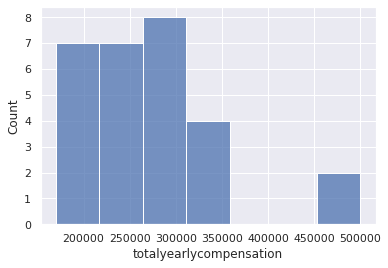

In [ ]:
ax = sns.histplot(dsgoogle_df['totalyearlycompensation'])

**Results Explanation**

This histogram analysis of Data Scientists salaries at Google presents that there is a salary range from 170,000 dollars to 500,000 dollars; with the scale leaning towards more Data Scientists at Google that fall within the 170,000 dollars to 350,000 salary range.

*Plot a histogram for Microsoft Data Scientists salaries.*

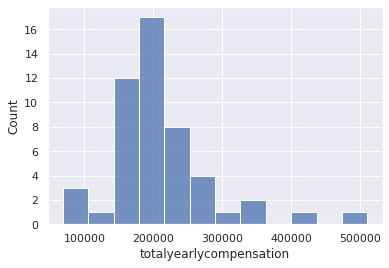

In [ ]:
ax = sns.histplot(dsmicrosoft_df['totalyearlycompensation'])

**Results Explanation**

This histogram analysis of Data Scientists salaries at Microsoft presents that there is a salary range from 69,000 dollars to 510,000 dollars; with the scale leaning towards more Data Scientists at Microsoft that fall within the 150,000 dollars to a little less than 300,000 salary range.

**Hypothesis One**: Boxplots

*Plot a boxplot for Google's Data Scientists Salaries*

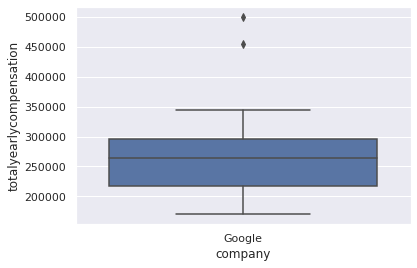

In [ ]:
sns.boxplot(y="totalyearlycompensation", x='company', data=dsgoogle_df)

**Results Explanation**

This boxplot of Data Scientists salaries at Google shows that 50% of salaries fall within 210,000 and 300,000 dollars. With a median salary of 265,000 dollars. Minimum salaries starting at 170,000, maximum salary range of 350,000, and two outliers of around 450,000 and 500,000 salaries.

*Plot a boxplot for Microsoft's Data Scientist Salaries*

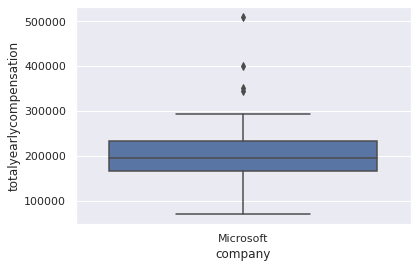

In [ ]:
sns.boxplot(y="totalyearlycompensation", x='company', data=dsmicrosoft_df)

**Results Explanation**

This boxplot of Data Scientists salaries at Microsoft shows that 50% of salaries fall within 170,000 and 220,000 dollars. With a median salary of 194,000 dollars. Minimum salaries starting at 69,000, maximum salary range of around 290,000, and four outliers of around 340,000 and 350,000, 400,000 and 510,000 salaries.

*Comparison of Google and Microsoft Data Scientist Salaries*

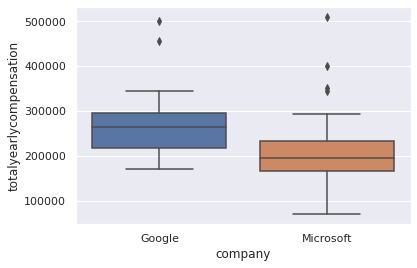

In [ ]:
sns.boxplot(y="totalyearlycompensation", x="company", data=gm_df)

**Results Explanation**

The boxplot comparison of Data Scientists salaries at Google vs Micrsoft show how Google has higher starting and midrange salaries. However, Data Scientists at Google have a couple outlier salaries above the 450,000 range. Whereas Microsoft presents a lower minimim and midrange salary but has many outlier salaries that fall above 300,000 dollars.

**Hypothesis One**: Independent T-Test

*Import ttest_ind from scipy.stats*

In [ ]:
from scipy.stats import ttest_ind

*Perform Independent ttest for Hypothesis One.*

In [ ]:
stats.ttest_ind(dsgoogle_df['totalyearlycompensation'],dsmicrosoft_df['totalyearlycompensation'])

Ttest_indResult(statistic=3.453968802590388, pvalue=0.0009064496948144533)

**Results Explanation**

*Since there is a p-value of 0.000906, which is smaller than the alpha 0.05; we can conclude that there is a significant difference is salaries between Data Scientists who work and Google versus Microsoft.
We would reject the NULL Hypothesis.*

**Hypothesis One**: Confidence Interval

*Calculate the sample size, mean, and variance of each sample.*

In [ ]:
sample_1_n = dsgoogle_df.shape[0]
sample_2_n = dsmicrosoft_df.shape[0]
sample_1_mean = dsgoogle_df['totalyearlycompensation'].mean()
sample_2_mean = dsmicrosoft_df['totalyearlycompensation'].mean()
sample_1_var = dsgoogle_df['totalyearlycompensation'].var()
sample_2_var = dsmicrosoft_df['totalyearlycompensation'].var()

*Calculate the standard error and compute the confidence intervals.*

In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -97219.63521381834 and -26577.507643324505.


*The difference between mean salaries for Data Scientists at Google versus Microsoft is likely between 26,577.51 dollars and 97,219.64 dollars.*

________________________________________________________________________________

**Hypothesis Two** : There isn’t a significant difference in mean salary among males data scientists versus female data scientists in San Francisco, CA.

*Obtain statistical values for total yearly compensation for male and female Data Scientist in San Francisco, CA.*

In [ ]:
series_statistics(malesf_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 650000
The min value in the column: 104000
The mode value in the column: 0    200000
dtype: int64
The median value in the column: 250000.0
The mean of the column: 277311.6883116883
The std of the column: 113206.99017615333


In [ ]:
series_statistics(femalesf_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 520000
The min value in the column: 106000
The mode value in the column: 0    185000
1    210000
2    305000
dtype: int64
The median value in the column: 210000.0
The mean of the column: 221928.57142857142
The std of the column: 91935.13356203266


**Hypothesis Two**: Histograms

*Plot a histogram for Male Data Scientists salaries in San Francisco, CA.*

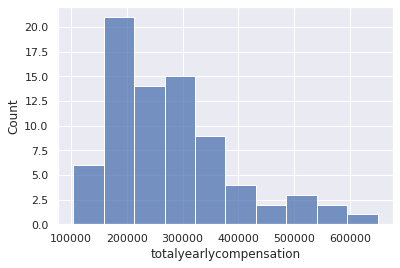

In [ ]:
ax = sns.histplot(malesf_df['totalyearlycompensation'])

**Results Explanation**

This histogram analysis of Male Data Scientists salaries located in San Francisco, CA presents that there is a salary range from 104,000 dollars to 650,000 dollars; with the scale leaning towards more Male Data Scientists located in San Francisco, CA that fall within the 200,000 dollars to 380,000 salary range.

*Plot a histogram for Female Data Scientists salaries in San Francisco, CA.*

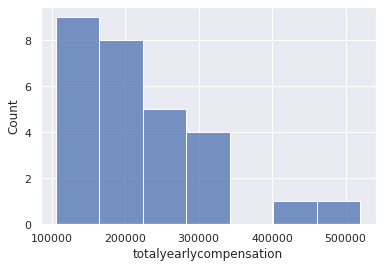

In [ ]:
ax = sns.histplot(femalesf_df['totalyearlycompensation'])

**Results Explanation**

This histogram analysis of Female Data Scientists salaries located in San Francisco, CA presents that there is a salary range from 106,000 dollars to 520,000 dollars; with the scale leaning towards more Female Data Scientists located in San Francisco, CA that fall within the 106,000 dollars to 340,000 salary range.

**Hypothesis Two**: Boxplots

*Plot a boxplot for Male Data Scientists salaries in San Francisco, CA.*

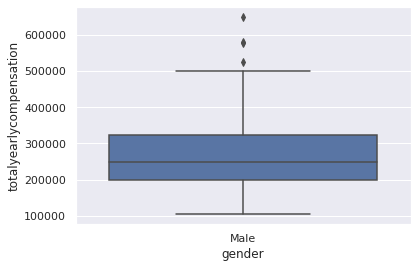

In [ ]:
sns.boxplot(y="totalyearlycompensation",x='gender', data=malesf_df)

**Results Explanation**

This boxplot of Male Data Scientists salaries located in San Francisco, CA shows that 50% of salaries fall within 200,000 and 310,000 dollars. With a median salary of 250,000 dollars. Minimum salaries starting at 104,000, maximum salary range of 500,000, and three outliers of around 510,000 dollars and 580,000 dollars, and 650,000 dollars salaries.

*Plot a boxplot for Female Data Scientists salaries in San Francisco, CA.*

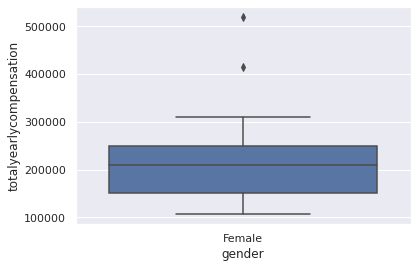

In [ ]:
sns.boxplot(y="totalyearlycompensation", x='gender', data=femalesf_df)

**Results Explanation**

This boxplot of Female Data Scientists salaries located in San Francisco, CA shows that 50% of salaries fall within 150,000 and 250,000 dollars. With a median salary of 210,000 dollars. Minimum salaries starting at 106,000, maximum salary range of 310,000, and two outliers of around 415,000 dollars and 520,000 dollars salaries.

*Boxplot Comparison Between both Male and Female Data Scientist Salaries located in San Francisco, CA.*

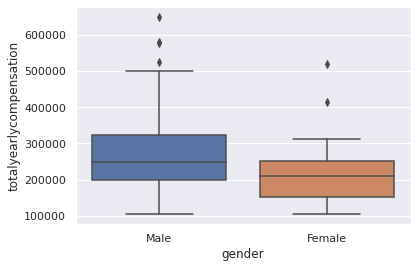

In [ ]:
sns.boxplot(y="totalyearlycompensation", x="gender", data=mf_df)

**Results Explanation**

The boxplot comparison of Male and Female Data Scientists salaries located in San Francisco, CA show how Male Data Scientists has lower minimum and higher midrange and max salaries. However, Male Data Scientists in San Francisco, CA have a few outlier salaries above 500,000 to 650,000. Whereas Female Data Scientists presents a higher minimum salary and lower midrange and max salary but has many outlier salaries that fall above 400,000 dollars.

**Hypothesis Two**: Independent T-Test

*Perform Independent ttest calculations for Hypothesis Two.*

In [ ]:
stats.ttest_ind(malesf_df['totalyearlycompensation'],femalesf_df['totalyearlycompensation'])

Ttest_indResult(statistic=2.3229285932706154, pvalue=0.022148980767397575)

**Results Explanation**

*Since there is a p-value of 0.022, which is less than the alpha 0.05; we can conclude that there is a significant difference in salaries between male and female genders in San Francisco, CA for Data Scientists.
We would reject the NULL Hypothesis.*

**Hypothesis Two**: Confidence Interval

*Calculate the sample size, mean, and variance of each sample.*

In [ ]:
sample_1_n = malesf_df.shape[0]
sample_2_n = femalesf_df.shape[0]
sample_1_mean = malesf_df['totalyearlycompensation'].mean()
sample_2_mean = femalesf_df['totalyearlycompensation'].mean()
sample_1_var = malesf_df['totalyearlycompensation'].var()
sample_2_var = femalesf_df['totalyearlycompensation'].var()

*Calculate the standard error and compute the confidence intervals.*

In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -97797.93597424752 and -12968.29779198626.


*The difference between mean salaries for Male Data Scientists and Female Data Scientists in San Francisco, CA is likely between 12,968.30 dollars and 97,797.94 dollars.*

**Hypothesis Three**: There isn’t a significant difference in mean salary among data scientist individuals who reside in Seattle, WA versus Austin, TX.

*Obtain statistical values for total yearly compensation for Data Scientists in Seattle, WA and Austin, TX.*

In [ ]:
series_statistics(sea_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 690000
The min value in the column: 85000
The mode value in the column: 0    163000
1    165000
2    215000
3    300000
dtype: int64
The median value in the column: 214500.0
The mean of the column: 231383.72093023255
The std of the column: 91733.13835823242


In [ ]:
series_statistics(aus_df['totalyearlycompensation'])

statistics for column: totalyearlycompensation
The max value in the column: 289000
The min value in the column: 115000
The mode value in the column: 0    115000
1    142000
dtype: int64
The median value in the column: 171500.0
The mean of the column: 183555.55555555556
The std of the column: 53696.55725870989


**Hypothesis Three**: Histograms

*Plot a histogram for Data Scientists salaries in Seattle, WA.*

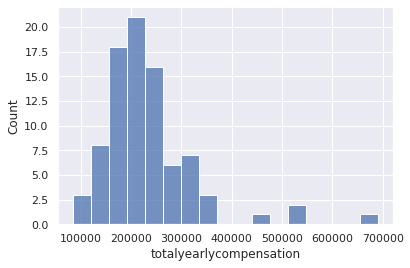

In [ ]:
ax = sns.histplot(sea_df['totalyearlycompensation'])

**Results Explanation**

This histogram analysis of Data Scientists salaries located in Seattle, WA presents that there is a salary range from 85,000 dollars to 690,000 dollars; with the scale leaning towards more Data Scientists located in Seattle, WA that fall within the 85,000 dollars to 370,000 salary range.

*Plot a histogram for Data Scientists salaries in Austin, TX.*

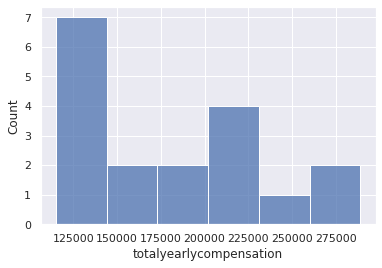

In [ ]:
ax = sns.histplot(aus_df['totalyearlycompensation'],)

**Results Explanation**

This histogram analysis of Data Scientists salaries located in Austin, TX presents that there is a salary range from 115,000 dollars to 289,000 dollars; with a higher amount of  Data Scientists located in Austin, TX within the 115,000 dollars and 140,000 dollars.

**Hypothesis Three**: Boxplots

*Plot a boxplot for Data Scientists salaries in Seattle, WA.*

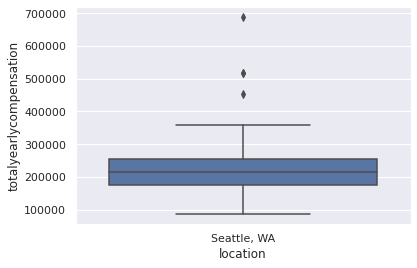

In [ ]:
sns.boxplot(y="totalyearlycompensation",x='location', data=sea_df)

**Results Explanation**

This boxplot of Data Scientists salaries located in Seattle, WA shows that 50% of salaries fall within 190,000 and 260,000 dollars. With a median salary of 214,500 dollars. Minimum salaries starting at 85,000, maximum salary range of 370,000, and three outliers of around 450,000 dollar and 520,000 dollar and 690,000 dollar salaries.

*Plot a boxplot for Data Scientists salaries in Austin, TX.*

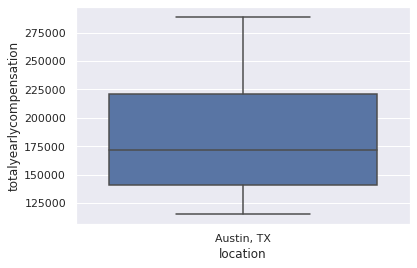

In [ ]:
sns.boxplot(y="totalyearlycompensation", x='location', data=aus_df)

**Results Explanation**

This boxplot of Data Scientists salaries located in Austin, TX shows that 50% of salaries fall within 140,000 and 220,000 dollars. With a median salary of 171,500 dollars. Minimum salaries starting at 115,000, maximum salary range of 289,000.

*Comparison Boxplot of Data Scientists Salaries in Seattle, WA versus Austin, TX.*

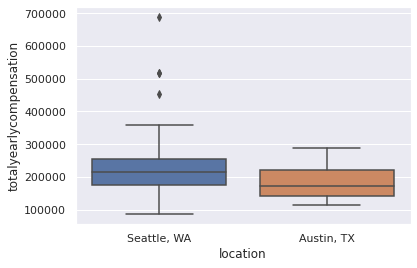

In [ ]:
sns.boxplot(y="totalyearlycompensation", x="location", data=sa_df)

**Results Explanation**

The boxplot comparison of Data Scientists salaries located in Seattle, WA and Austin, TX show how Seattle, WA Data Scientists has lower minimum and higher midrange and max salaries. However, Seattle, WA Data Scientists have a few outlier salaries above 450,000 to 690,000. Whereas Austin, TX Data Scientists presents a higher minimum salary and lower midrange and max salary.

**Hypothesis Three**: Independent T-Test

*Perform Independent ttest calculations for Hypothesis Three.*

In [ ]:
stats.ttest_ind(sea_df['totalyearlycompensation'],aus_df['totalyearlycompensation'])

Ttest_indResult(statistic=2.1316891472076076, pvalue=0.035434217911037943)

**Results Explanation**

*Since there is a p-value of 0.035, which is less than the alpha 0.05; we can conclude that there is significant difference between Data Scientists salaries in Seattle, WA versus Austin, TX.
We would reject the NULL Hypothesis.*

**Hypothesis Three**: Confidence Interval

*Calculate the sample size, mean, and variance of each sample.*

In [ ]:
sample_1_n = sea_df.shape[0]
sample_2_n = aus_df.shape[0]
sample_1_mean = sea_df['totalyearlycompensation'].mean()
sample_2_mean = aus_df['totalyearlycompensation'].mean()
sample_1_var = sea_df['totalyearlycompensation'].var()
sample_2_var = aus_df['totalyearlycompensation'].var()

*Calculate the standard error and compute the confidence intervals.*

In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -79312.4362290282 and -16343.894520325772.


*The difference between mean salaries for Data Scientists in Seattle, WA and Austin, TX is likely between 16,343.89 dollars and 79,312.44 dollars.*

________________________________________________________________________________

# **Hypotheses Conclusions**

**Hypothesis One**: *Since there is a p-value of 0.000906, which is smaller than the alpha 0.05; we can conclude that there is a significant difference is salaries between Data Scientists who work and Google versus Microsoft.
We would reject the NULL Hypothesis.*

**Hypothesis Two**: *Since there is a p-value of 0.022, which is less than the alpha 0.05; we can conclude that there is a significant difference is salaries between male and female genders in San Francisco, CA for Data Scientists.
We would reject the NULL Hypothesis.*

**Hypothesis Three**: *Since there is a p-value of 0.035, which is less than the alpha 0.05; we can conclude that there is a significant difference between Data Scientists in Seattle, WA versus Austin, TX.
We would reject the NULL Hypothesis.*

________________________________________________________________________________

# **Valuable Findings**

**Hypthesis One**:  *By taking the difference between mean salaries for Data Scientists at Google (272,178.57 dollars) versus Micorosoft (210,280.00 dollars); we can see that there is a difference of 61,898.57 dollars in pay. Data Scientists at Microsoft are making 77% of what Data Scientists are making at Google.*

**Hypothesis Two**: *By taking the difference between mean salaries for Male Data Scientists (277,311.69 dollars) versus Female Data Scientists (221,928.57 dollars) located in San Francisco, CA; we can see that there is a difference of 55,383.12 dollars in pay. Female Data Scientists in San Francisco, CA are making 80% of what Male Data Scientists are making in San Francisco, CA.*

**Hypothesis Three**: *By taking the difference between mean salaries for Data Scientists in Seattle, WA (231,383.72 dollars) versus  Data Scientists in Austin, TX (183,555.56 dollars); we can see that there is a difference of 47,828.16 dollars in pay. Data Scientists in Austin, TX are making 79% of what Data Scientists are making in Seattle, WA.*

________________________________________________________________________________

# **Evaluate Findings**

####Why are these findings valuable?

**Hypothesis One**: *When job seekers or career changers are looking for companies to be employed at, Google and Microsoft will be nice options for sizeable total yearly compensation. More precisely, Google pays their Data Scientists a higher total yearly compensation. This can conclude that Google may deem their Data Scientist as more valuable for monetary investment. Or Google may have a larger fund to invest in their Data Science departments and thus a greater need to invest in expanding their Data Science departments.*

**Hypothesis Two**: *Female Data Scientist job seekers should feel confident asking for a higher total yearly salary range in San Francisco, CA. It appears that Hiring Managers and Recruiters need present a gender equal salary range for job candidates in San Francisco, CA, and be more persistent about closing the "wage gap" between genders. In addition, there needs to be more of an emphasis on recruiting and hiring qualified female Data Scientists.*

**Hypothesis Three**: *There appears to be a large wage gap among the Seattle, WA and Austin, TX locations. Job seekers might be inclined to go to a city (Seattle) with a higher total yearly salary. However, those seeking for job relocation may want to consider the costs of living in their selected city. Austin, TX might have a much lower cost of living than Seattle, WA. Thus, influencing the higher salaries in Seattle for Data Scientist. This information may be pivotal to the Hiring Manager when considering a candidate who lives out-of-state. Would a Data Scientist candidate who lives in Seattle, WA consider moving to Austin, TX for an assumed lower salary? These are questions to consider when finding the right candidate for the role.*

________________________________________________________________________________